In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pd.__version__

'0.22.0'

In [4]:
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii >> 'monthly.ao.index.b50.current.ascii'
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2020-03-04 16:14:05--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.19
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:80... connected.
HTTP request sent, awaiting response... 302 Object Moved
Location: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii [following]
--2020-03-04 16:14:05--  https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21050 (21K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii.1’

100%[======================================>] 21,050      --.-K/s   in 0.02s   

2020-03-04 16:14:05 (879 KB/s) - ‘monthly.ao.index.b50.current.ascii.1’ saved [21050/21050]



In [5]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

In [6]:
ao[0:2]
ao.shape

(842, 3)

In [7]:
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates
dates.shape

(842,)

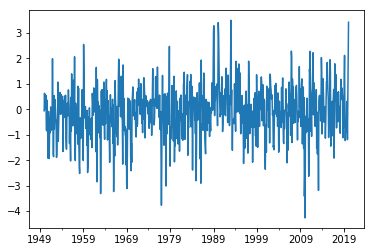

In [8]:
AO = Series(ao[:,2], index=dates)
AO
AO.plot()

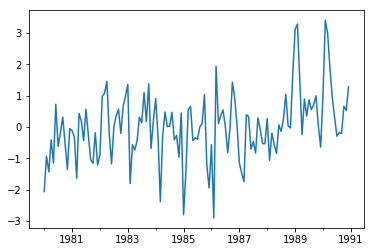

In [9]:
AO['1980':'1990'].plot()

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
1951-07-31    0.090023
1951-12-31    1.987200
                ...   
2018-12-31    0.109730
2019-02-28    1.149500
2019-03-31    2.116100
2019-09-30    0.306200
2019-12-31    0.412070
2020-01-31    2.419000
2020-02-29    3.417200
Length: 396, dtype: float64

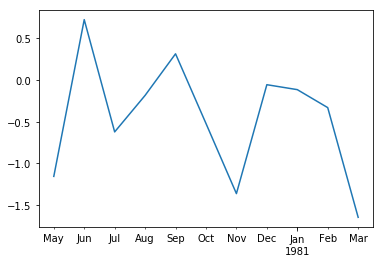

In [10]:
AO['1980-05':'1981-03'].plot()
AO[120]
AO['1960-01']
AO['1960']
AO[AO > 0]

In [11]:
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii >> 'norm.nao.monthly.b5001.current.ascii'
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

--2020-03-04 16:14:06--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.19
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:80... connected.
HTTP request sent, awaiting response... 302 Object Moved
Location: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii [following]
--2020-03-04 16:14:06--  https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20184 (20K) [text/plain]
Saving to: ‘norm.nao.monthly.b5001.current.ascii.1’

100%[======================================>] 20,184      --.-K/s   in 0.02s   

2020-03-04 16:14:06 (838 KB/s) - ‘norm.nao.monthly.b5001.current.ascii.1’ saved [20184/20184]



In [12]:
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
NAO = Series(nao[:,2], index=dates_nao)

In [13]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', length=841, freq='M')

In [14]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2ba95ea11e80>,
      dtype=object)

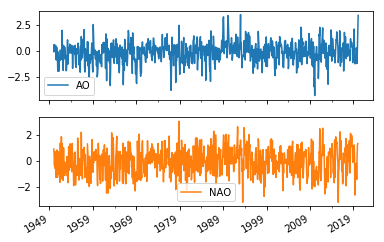

In [15]:
aonao.plot(subplots=True)

In [16]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


In [17]:
aonao['NAO']

1950-01-31    0.92000
1950-02-28    0.40000
1950-03-31   -0.36000
1950-04-30    0.73000
1950-05-31   -0.59000
1950-06-30   -0.06000
1950-07-31   -1.26000
               ...   
2019-08-31   -1.16840
2019-09-30   -0.16408
2019-10-31   -1.41340
2019-11-30    0.27847
2019-12-31    1.20160
2020-01-31    1.34320
2020-02-29        NaN
Freq: M, Name: NAO, Length: 842, dtype: float64

In [18]:
aonao.NAO

1950-01-31    0.92000
1950-02-28    0.40000
1950-03-31   -0.36000
1950-04-30    0.73000
1950-05-31   -0.59000
1950-06-30   -0.06000
1950-07-31   -1.26000
               ...   
2019-08-31   -1.16840
2019-09-30   -0.16408
2019-10-31   -1.41340
2019-11-30    0.27847
2019-12-31    1.20160
2020-01-31    1.34320
2020-02-29        NaN
Freq: M, Name: NAO, Length: 842, dtype: float64

In [19]:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


In [20]:
del aonao['Diff']
aonao.tail()

,AO,NAO
2019-10-31,-0.082195,-1.41340
2019-11-30,-1.193400,0.27847
2019-12-31,0.412070,1.20160
2020-01-31,2.419000,1.34320
2020-02-29,3.417200,NaN


In [21]:
aonao['1981-01':'1981-03']

,AO,NAO
1981-01-31,-0.11634,0.37
1981-02-28,-0.33158,0.92
1981-03-31,-1.64470,-1.19


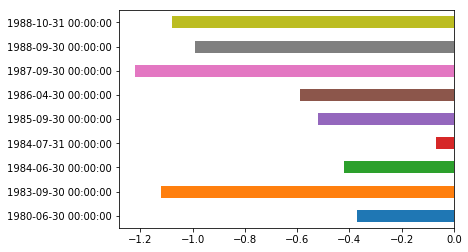

In [22]:
import datetime
aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')

In [23]:
#Stats man
aonao.mean()
aonao.max()
aonao.min()

AO    -4.2657
NAO   -3.1800
dtype: float64

In [24]:
aonao.mean(1)
aonao.describe()

,AO,NAO
count,842.000000,841.000000
mean,-0.099993,-0.002171
std,1.009606,1.021176
min,-4.265700,-3.180000
25%,-0.651515,-0.750000
50%,-0.037124,0.060000
75%,0.485400,0.720000
max,3.495300,3.040000


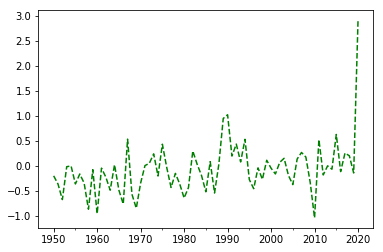

In [25]:
#Resampling 
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')

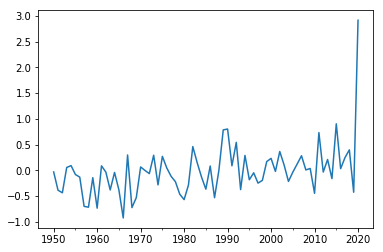

In [26]:
#Median
AO_mm = AO.resample("A").median()
AO_mm.plot()

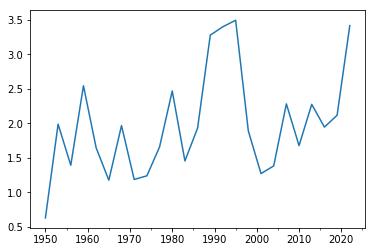

In [27]:
#Max
AO_mm = AO.resample("3A").apply(np.max)
AO_mm.plot()

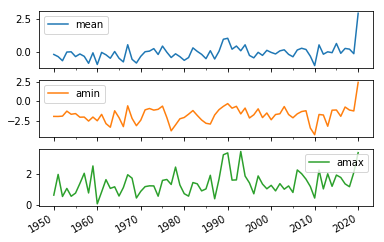

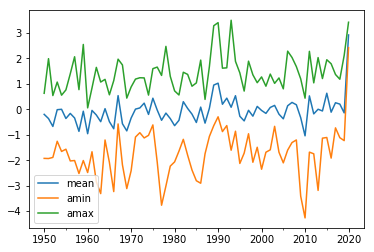

In [28]:
#All resample 
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

In [29]:
AO_mm

,mean,amin,amax
1950-12-31,-0.199501,-1.92810,0.62681
1951-12-31,-0.364626,-1.93410,1.98720
1952-12-31,-0.674990,-1.89090,0.53852
1953-12-31,-0.016515,-1.25580,1.06830
1954-12-31,-0.000770,-1.65610,0.55259
1955-12-31,-0.361816,-1.56810,0.76012
1956-12-31,-0.162823,-2.02860,1.39110
...,...,...,...
2014-12-31,-0.066734,-1.13440,1.20580
2015-12-31,0.629559,-1.10790,1.94500


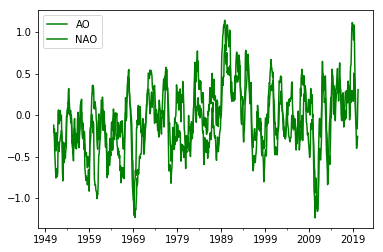

In [30]:
##Rolling stats- mean 
aonao.rolling(window=12, center=False).mean().plot(style='-g')

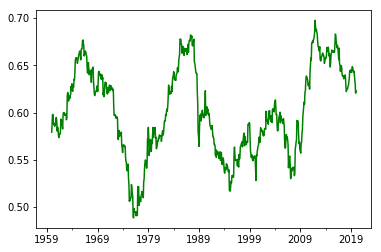

In [31]:
##Rolling correlation 
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-g')

In [32]:
##Corr coef
aonao.corr()

,AO,NAO
AO,1.000000,0.605904
NAO,0.605904,1.000000
